In [120]:
import itertools
import matplotlib_venn 
import matplotlib.pyplot as plt

class perm:
    def __init__(self, elementos):
        self.elementosDelProblema = []
        for e in elementos:
            self.elementosDelProblema.append(e)
        self.permutacionesSinRepetirElementos = []
        self.permutacionesRepitiendoElementos = []
        self.listaCondPorLongitudRes = []
        self.listaCondTodosDiferentes = []
        self.listaCondTodosIguales = []
        self.listaCondCantidadIguales = []
        self.listaCondCantidadElemento = []
        self.listaCondLugarElemento = []
        self.listaCondEliminarJuntos = []
        self.listaCondHastaEncontrar = []
        self.permutacionesRepitiendoCantidades = []
        self.listaCondConteoOrdenadoMayor = []

    def permSR(self):
        self.permutacionesSinRepetirElementos = []
        self.permutacionesSinRepetirElementos = list(itertools.permutations(self.elementosDelProblema, None))
        return self.permutacionesSinRepetirElementos

    def permR(self, repeticiones=None):
        self.permutacionesRepitiendoElementos = []
        rep = 0
        if repeticiones==None:
            rep = len(self.elementosDelProblema)
        else:
            rep = repeticiones
        self.permutacionesRepitiendoElementos = [e for e in itertools.product(self.elementosDelProblema, repeat=rep)]
        return self.permutacionesRepitiendoElementos

    def permRCantidades(self, cantidades):
        lista = self.permR(sum(cantidades))
        indexCantidad = -1
        self.permutacionesRepitiendoElementos = []
        for cantidad in cantidades:
            indexCantidad += 1
            lista = self.condCantidadElementoRep(cantidad, self.elementosDelProblema[indexCantidad] , lista)
        self.permutacionesRepitiendoCantidades = lista
        return self.permutacionesRepitiendoCantidades

    def condLongitudRes(self, longitud, lista):
        self.listaCondPorLongitudRes = []
        for resultado in lista:
            if len(resultado) == longitud:
                self.listaCondPorLongitudRes.append(resultado)
        return self.listaCondPorLongitudRes

    def condTodosDiferentesRes(self, lista):
        self.listaCondTodosDiferentes = []
        for resultado in lista:
            existeDiferencia = (len(set(resultado))==len(resultado))
            if existeDiferencia == True:
                self.listaCondTodosDiferentes.append(resultado)
        return self.listaCondTodosDiferentes

    def condTodosIgualesRes(self, lista):
        self.listaCondTodosIguales = []
        for resultado in lista:
            existeIgualdad = (all(e==resultado[0] for e in resultado))
            if existeIgualdad == True:
                self.listaCondTodosIguales.append(resultado)
        return self.listaCondTodosIguales

    def condCantidadResIguales(self, cantidad, lista):
        self.listaCondCantidadIguales = []
        for resultado in lista:
            for elemento in self.elementosDelProblema:
                cantidadElemento = resultado.count(elemento)
                if cantidadElemento == cantidad:
                    self.listaCondCantidadIguales.append(resultado)
        return self.listaCondCantidadIguales

    def condCantidadElementoRep(self, cantidad, elemento, lista, minimo=False, maximo=False):
        self.listaCondCantidadElemento = []
        for resultado in lista:
            cantidadElemento = resultado.count(elemento)
            if minimo == False and maximo == False:
                if cantidadElemento == cantidad:
                    self.listaCondCantidadElemento.append(resultado)
            else:
                if minimo != False and cantidadElemento >= minimo:
                    self.listaCondCantidadElemento.append(resultado)
                elif maximo != False and cantidadElemento <= maximo:
                    self.listaCondCantidadElemento.append(resultado)
        return self.listaCondCantidadElemento

    def condLugarElementoRep(self, lugares, elemento, lista):
        self.listaCondLugarElemento = []
        for index in lugares:
            for resultado in lista:
                if resultado[index] == elemento:
                    self.listaCondLugarElemento.append(resultado)
        return self.listaCondLugarElemento

    def condEliminarJuntos(self, e1, e2, lista, lugares = None):
        lugarScope = lugares
        self.listaCondEliminarJuntosLugar = lista
        listaIndexEliminar = []
        if lugares == None:
            for res in lista:
                noEsUltimoElemento = i != (len(resultado)-1)
                for i in range(len(resultado)):
                    if noEsUltimoElemento:
                        if ((res[e] == e1)and(res[e+1] == e2))or((res[e] == e2)and(res[e+1] == e1)):
                            listaIndexEliminar.append(lista.index(res))
        else:
            l1 = lugarScope[0]
            l2 = lugarScope[1]
            for res in lista:
                if ((res[l1] == e1)and(res[l2] == e2))or((res[l1] == e2)and(res[l2] == e1)):
                    listaIndexEliminar.append(lista.index(res))
        for index in sorted(listaIndexEliminar, reverse=True):
            del self.listaCondEliminarJuntosLugar[index]
        return self.listaCondEliminarJuntosLugar

    def condHastaEncontrarElemento(self, elementos, lista):
        self.listaCondHastaEncontrar = lista
        listaElementosMantener = []
        for resultado in self.listaCondHastaEncontrar:
            nuevoResultado = []
            resultadoTerminado = False
            for elemento in resultado:
                if resultadoTerminado == False:
                    for eValido in elementos:
                        if (elemento == eValido) and (elemento not in nuevoResultado):
                            nuevoResultado.append(elemento)
                            resultadoTerminado = True
                        elif (resultadoTerminado == False) and (elemento not in nuevoResultado) and (elemento not in elementos):
                            nuevoResultado.append(elemento)
            nuevoTuple = tuple(nuevoResultado)
            if nuevoTuple not in listaElementosMantener:
                listaElementosMantener.append(nuevoTuple)
        self.listaCondHastaEncontrar = listaElementosMantener
        return self.listaCondHastaEncontrar

    def condConteoMayor(self, mayor, menor, lista):
        self.listaCondConteoOrdenadoMayor = []
        conteoMayor = 0
        conteoMenor = 0
        for resultado in lista:
            conteoFueMayor = True
            for elemento in resultado:
                if elemento == mayor:
                    conteoMayor += 1
                if elemento == menor:
                    conteoMenor += 1
                if conteoMayor <= conteoMenor:
                    conteoFueMayor = False
            if conteoFueMayor == True:
                self.listaCondConteoOrdenadoMayor.append(resultado)
            conteoMayor = 0
            conteoMenor = 0
        return self.listaCondConteoOrdenadoMayor



In [121]:
# 4 Elementos (A,B,C,D). De AB gana uno. De CD gana uno.
# Los dos que ganan compiten entre si por el primer lugar.
# S = Resultados en orden de ganadores de izquierda a derecha (x4)
# Nota: AB no pueden estar en la final, CD no pueden estar en la final.
# a) Obtener resultados
# b) Obtener Evento A en donde A gana el torneo (lugar 1)
# c) Obtener Evento B en donde B queda en primero o segundo lugar (lugar 1 o 2)
# d) Union AB, inteseccion AB, complemento A

P1 = perm(["A", "B", "C", "D"])
permu = P1.permSR()
permu1 = P1.condEliminarJuntos("A", "B", permu, [0,1])
permu2 = P1.condEliminarJuntos("C", "D", permu1, [0,1])
print("Resultados:", len(permu2))
EventoA = P1.condLugarElementoRep([0],"A",permu2)
print("Resultados en A:", len(EventoA))
EventoB = P1.condLugarElementoRep([0,1],"B",permu2)
print("Resultados en B:", len(EventoB))
print("Union AB:", len(set(EventoA).union(set(EventoB))))
print("Interseccion AB:", len(set(EventoA).intersection(set(EventoB))))
print("Complemento A:", len(set(permu2).difference(set(EventoA))))

Resultados: 16
Resultados en A: 4
Resultados en B: 8
Union AB: 12
Interseccion AB: 0
Complemento A: 12


In [122]:
# 3 Elementos pueden ser (R,L,S). S = Resultados (x3) con repetidos.
# a) Evento A en donde todos los elementos son iguales.
# b) Evento B en donde todos los elementos son diferentes.
# c) Evento C en donde 2 elementos de los 3 elementos son R
# d) Evento D en donde 2 elementos de los 3 elementos son iguales
# e) Complemento D, Union CD, Interseccion CD

P2 = perm(["R", "L", "S"])
permu = P2.permR()
print("Resultados:", len(permu))
EventoA = P2.condTodosIgualesRes(permu)
print("Resultados en A:", len(EventoA))
EventoB = P2.condTodosDiferentesRes(permu)
print("Resultados en B:", len(EventoB))
EventoC = P2.condCantidadElementoRep(2, "R", permu)
print("Resultados en C:", len(EventoC))
EventoD = P2.condCantidadResIguales(2, permu)
print("Resultados en D:", len(EventoD))
print("Complemento D:", len(set(permu).difference(set(EventoD))))
print("Union CD:", len(set(EventoC).union(set(EventoD))))
print("Interseccion CD:", len(set(EventoC).intersection(set(EventoD))))

Resultados: 27
Resultados en A: 3
Resultados en B: 6
Resultados en C: 6
Resultados en D: 18
Complemento D: 9
Union CD: 18
Interseccion CD: 6


In [123]:
# 3 Elementos pueden ser (S,F). S = Resultados (x3) con repetidos.
# Resultado es S solo si el lugar 1 es S y alguno de los dos restantes son S.
# a) Evento A en donde 2 elementos son S
# b) Evento B en donde (minimo) 2 elementos son S
# c) Evento C en donde el resultado es S
# d) Complemento C, Union AC, Interseccion AC, Union BC, Interseccion BC

P3 = perm(["S", "F"])
permu = P3.permR(3)
print("Resultados:", len(permu))
EventoA = P3.condCantidadElementoRep(2, "S", permu)
print("Resultados en A:", len(EventoA))
EventoB = P3.condCantidadElementoRep(2, "S", permu, minimo=2)
print("Resultados en B:", len(EventoB))
EventoC1 = P3.condLugarElementoRep([0], "S", permu)
EventoC2 = P3.condLugarElementoRep([1,2], "S", permu)
EventoC = set(EventoC1).intersection(set(EventoC2))
print("Resultados en C:", len(EventoC))
print("Complemento C:", len(set(permu).difference(set(EventoC))))
print("Union AC:", len(set(EventoA).union(set(EventoC))))
print("Interseccion AC:", len(set(EventoA).intersection(set(EventoC))))
print("Union BC:", len(set(EventoB).union(set(EventoC))))
print("Interseccion BC:", len(set(EventoB).intersection(set(EventoC))))

Resultados: 8
Resultados en A: 3
Resultados en B: 4
Resultados en C: 3
Complemento C: 5
Union AC: 4
Interseccion AC: 2
Union BC: 4
Interseccion BC: 3


In [124]:
# 4 Elementos pueden ser (F,V). S = Resultados (x4) con repetidos.
# a) Obtener resultados
# b) Evento A en donde 3 de los elementos son F
# c) Evento B en donde todos elementos son iguales
# d) Evento C en donde (maximo) 1 elemento es V
# e) Union BC, Interseccion BC, Union AC, Interseccion AC

P4 = perm(["F", "V"])
permu = P4.permR(4)
print("Resultados:", len(permu))
EventoA = P4.condCantidadElementoRep(3,"F",permu)
print("Resultados en A:", len(EventoA))
EventoB = P4.condTodosIgualesRes(permu)
print("Resultados en B:", len(EventoB))
EventoC = P4.condCantidadElementoRep(1,"V",permu, maximo=1)
print("Resultados en C:", len(EventoC))
print("Union BC:", len(set(EventoB).union(set(EventoC))))
print("Interseccion BC:", len(set(EventoB).intersection(set(EventoC))))
print("Union AB:", len(set(EventoA).union(set(EventoB))))
print("Interseccion AB:", len(set(EventoA).intersection(set(EventoB))))

Resultados: 16
Resultados en A: 4
Resultados en B: 2
Resultados en C: 5
Union BC: 6
Interseccion BC: 1
Union AB: 6
Interseccion AB: 0


In [125]:
# 3 elementos ordenados (A,B,C) asignadas (1,2,3) lugares.
# S = Resultados (x3) lugares asignados a cada elemento.
# a) Obtener resultados
# b) Evento A en donde todos son iguales
# c) Evento B en donde todos son diferentes
# d) Evento C en donde ninguno es 2

P5 = perm(["1","2","3"])
permu = P5.permR(3)
print("Resultados:", len(permu))
EventoA = P5.condTodosIgualesRes(permu)
print("Resultados en A:", len(EventoA))
EventoB = P5.condTodosDiferentesRes(permu)
print("Resultados en B:", len(EventoB))
EventoC = P5.condCantidadElementoRep(0,"2",permu)
print("Resultados en C:", len(EventoC))

Resultados: 27
Resultados en A: 3
Resultados en B: 6
Resultados en C: 8


In [126]:
# 5 elementos (1,2,3,4,5). (1,2) tipo A. (3,4,5) tipo B.
# Resultados (x1 a x5) sacando de uno a uno sin repetir. Se detiene resultado cuando se saca uno tipo B.
# a) Obtener resultados
# b) Evento A en donde resultado tienen un elemento.
# c) Evento B en donde el ultimo es 5
# d) Evento C en donde ninguno es 1

P6 = perm(["1","2","3","4","5"])
permu = P6.permSR()
permu2 = P6.condHastaEncontrarElemento(["3","4","5"], permu)
print("Resultados:", len(permu2))
EventoA = P6.condLongitudRes(1, permu2)
print("Resultados en A:", len(EventoA))
EventoB = P6.condCantidadElementoRep(1,"5",permu2)
print("Resultados en B:", len(EventoB))
EventoC = P6.condCantidadElementoRep(0,"1",permu2)
print("Resultados en C:", len(EventoC))

Resultados: 15
Resultados en A: 3
Resultados en B: 5
Resultados en C: 6


In [127]:
# Caja con 4 elementos A y 3 elementos B. Se van seleccionando uno por uno.
# Resultados (x7). 
# a) Obtener resultados
# b) Evento A en donde conteo de A siempre es mayor a B.

P7 = perm(["A","B"])
permu = P7.permRCantidades([4,3])
print("Resultados:", len(permu))
EventoA = P7.condConteoMayor("A", "B", permu)
print("Resultados en A:", len(EventoA))

Resultados: 35
Resultados en A: 5


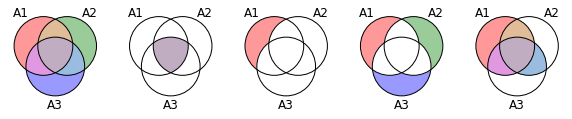

In [128]:
# Usar diagrama de Venn para representar eventos A1, A2, A3
# a) (Minimo) 1 evento cualquiera ocurre. (A1 o A2 o A3) 
# b) Todos los eventos ocurren. (A1 y A2 y A3)
# c) Solo el evento A1 ocurre (A1 - (A2 o A3))
# d) Solo 1 evento cualquiera  ocurre (A1 - (A2 o A3)) o (A2 - (A1 o A3)) o (A3 - (A1 o A2))
# e) El evento A1 ocurreo o A2 y A3 ocurren (A1 o (A2 y A3))

from matplotlib_venn import venn3

figure, axes = plt.subplots(1, 5, squeeze=False, figsize=(10,5))
sub = (1, 1, 1, 1, 1, 1, 1)
labels = ('A1', 'A2', 'A3')
regions = ['100', '101', '110', '010', '001', '011', '111']

v1 = venn3(subsets = sub, set_labels = labels , ax=axes[0][0])
c = matplotlib_venn.venn3_circles(subsets=sub, linestyle="solid", ax=axes[0][0], linewidth=1.0)
for r in regions:
    v1.get_label_by_id(r).set_text(None)

v2 = venn3(subsets=sub, set_labels = labels, ax=axes[0][1])
c = matplotlib_venn.venn3_circles(subsets=sub, linestyle="solid", ax=axes[0][1], linewidth=1.0)
for r in regions:
    v2.get_label_by_id(r).set_text(None)
    if r != '111':
        v2.get_patch_by_id(r).set_color('white')

v3 = venn3(subsets=sub, set_labels = labels, ax=axes[0][2])
c = matplotlib_venn.venn3_circles(subsets=sub, linestyle="solid", ax=axes[0][2], linewidth=1.0)
for r in regions:
    v3.get_label_by_id(r).set_text(None)
    if r != '100':
        v3.get_patch_by_id(r).set_color('white')

v4 = venn3(subsets=sub, set_labels = labels, ax=axes[0][3])
c = matplotlib_venn.venn3_circles(subsets=sub, linestyle="solid", ax=axes[0][3], linewidth=1.0)
for r in regions:
    v4.get_label_by_id(r).set_text(None)
    if r != '100' and r != '010' and r != '001':
        v4.get_patch_by_id(r).set_color('white')

v5 = venn3(subsets=sub, set_labels = labels, ax=axes[0][4])
c = matplotlib_venn.venn3_circles(subsets=sub, linestyle="solid", ax=axes[0][4], linewidth=1.0)
for r in regions:
    v5.get_label_by_id(r).set_text(None)
    if r == '010' or r == '001':
        v5.get_patch_by_id(r).set_color('white')

plt.show()

In [129]:
import itertools
import matplotlib_venn 
import matplotlib.pyplot as plt

class porc:
    def __init__(self, elementos):
        self.elementosDelProblema = []
        for e in elementos:
            self.elementosDelProblema.append(e)
        self.porcentaje = 0
        self.porcentajeComplemento = 0
        self.porcentajeElementos = []

    def asignarP(self, porcentajes):
        self.porcentajeElementos = []
        self.porcentajeElementos = list(zip(self.elementosDelProblema, porcentajes))
        return self.porcentajeElementos
    
    def buscarP(self, elemento):
        for e in self.porcentajeElementos:
            if e[0] == elemento:
                return e[1]

    def obtenerUnionMEP(self, elementos, lista):
        self.porcentaje = 0
        porcentajesElementos = []
        for pareja in lista:
            for elemento in elementos:
                if pareja[0] == elemento:
                    porcentajesElementos.append(pareja[1])
        self.porcentaje = sum(porcentajesElementos)
        return self.porcentaje

    def obtenerUnionMECP(self, elementos, lista):
        self.porcentajeComplemento = 0
        porc = self.obtenerUnionMEP(elementos, lista)
        self.porcentajeComplemento = 1 - porc
        return self.porcentajeComplemento

    def obtenerUnionP(self, elementos, lista, interseccion = 0):
        self.porcentaje = 0
        porcentajesElementos = []
        for pareja in lista:
            for elemento in elementos:
                if pareja[0] == elemento:
                    porcentajesElementos.append(pareja[1])
        self.porcentaje = sum(porcentajesElementos) - interseccion
        return self.porcentaje

    def obtenerInterP(self, elementos, lista, interseccion = 0, comp1 = True, comp2 = True):
        self.porcentaje = 0
        if comp1 == False and comp2 == False:
            self.porcentaje = 1 - self.obtenerUnionP(elementos,porcentajes, interseccion)
        elif comp1 == False and comp2 == True:
            self.porcentaje = (self.buscarP(elementos[1])) - interseccion
        elif comp1 == True and comp2 == False:
            self.porcentaje = (self.buscarP(elementos[0])) - interseccion
        else:
            self.porcentaje = (self.buscarP(elementos[0]) + self.buscarP(elementos[1])) - interseccion
        return self.porcentaje

    def obtenerUnionCP(self, elementos, lista, interseccion = 0):
        self.porcentajeComplemento = 0
        porc = self.obtenerUnionP(elementos, lista, interseccion)
        self.porcentajeComplemento = 1 - porc
        return self.porcentajeComplemento



In [130]:
# Personas eligen opciones = A,B,C,D,E,F,G (ME)
# A = tipo1, B,C,D = tipo2, E,F = tipo 3, G = tipo 4
# Poblacion al elegir una sola opcion se distribuye como:
# P(A) = 0.2 | P(B) = 0.15 | P(C) = 0.1 | P(D) = 0.05 | P(E) = 0.18 | P(F) = 0.25 | P(G) = 0.07
# a) Probabilidad de que un individuo eliga opcion G = (G)
# b) Probabilidad de que un individuo eliga una opcion tipo 2 = (B o C o D)
# c) Probabilidad de que individuo NO eliga una opcion tipo 3 = (E o F)'

P11 = porc(["A", "B", "C", "D", "E", "F", "G"])
porcentajes = P11.asignarP([0.2, 0.15, 0.1, 0.05, 0.18, 0.25, 0.07])
G = P11.buscarP("G")
Union_BCD = P11.obtenerUnionMEP(["B","C","D"],porcentajes)
Comp_Union_EF = P11.obtenerUnionMECP(["E", "F"],porcentajes)
print(G, Union_BCD, Comp_Union_EF)

0.07 0.3 0.5700000000000001


In [131]:
# Personas eligen opciones = A,B
# P(A) = 0.5 | P(B) = 0.4 | P(A y B) = 0.25
# a) Probabilidad de que eligan A o B = (A o B)
# b) Probabilidad de que eligan ninguna, es decir que NO eligan A o B = (A o B)'
# c) Probabilidad de que eligan A pero NO B = (A y (B)') = A - (AyB)

P12 = porc(["A", "B"])
porcentajes = P12.asignarP([0.5, 0.4])
Union_AB = P12.obtenerUnionP(["A","B"],porcentajes, 0.25)
Comp_Union_AB = 1 - Union_AB
Inter_ACompB = P12.obtenerInterP(["A","B"],porcentajes, 0.25, True, False)
print(Union_AB, Comp_Union_AB, Inter_ACompB)

0.65 0.35 0.25


In [132]:
# Opciones A1, A2, A3
# P(A1) = 0.22 | P(A2) = 0.25 | P(A3) = 0.28
# P(A1 y A2) = 0.11 | P(A1 y A3) = 0.05 | P(A2 y A3) = 0.07 | P(A1 y A2 y A3) = 0.01 
# a) Probabilidad de que suceda A1 o A2 = (A1 o A2)
# b) Probabilidad de que NO suceda A1 y NO suceda A2 = (A1' y A2')
# c) Probabilidad de que suceda A1 o A2 o A3 = (A1 o A2 o A3) 
# d) Probabilidad de que NO suceda A1 y NO suceda A2 y A3 = (A1' y A2' y A3') 
# e) Probabilidad de que No suceda A1 y NO suceda A2 y suceda A3 = (A1' y A2' y A3)
# f) Probabilidad de que NO suceda A1 y A2 o que suceda A3 = (A1' y A2') o (A3)

P13 = porc(["A1", "A2", "A3"])
porcentajes = P13.asignarP([0.22, 0.25, 0.28])
Union_A1A2 = P13.obtenerUnionP(["A1","A2"],porcentajes, 0.11)
Inter_CompA1CompA2 = P12.obtenerInterP(["A1","A2"],porcentajes, 0.11, False, False)

print(Union_A1A2, Inter_CompA1CompA2)




0.36 0.78
